In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cars.csv')

In [3]:
df.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [5]:
df.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [7]:
df.columns = df.columns.str.strip() 
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')
df.dtypes

mpg            float64
cylinders        int64
cubicinches    float64
hp               int64
weightlbs      float64
time-to-60       int64
year             int64
brand           object
dtype: object

In [8]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    float64
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    float64
 5   time-to-60   256 non-null    int64  
 6   year         256 non-null    int64  
 7   brand        256 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 18.0+ KB


1.Can you find that there is improvement in mpg over the years ?


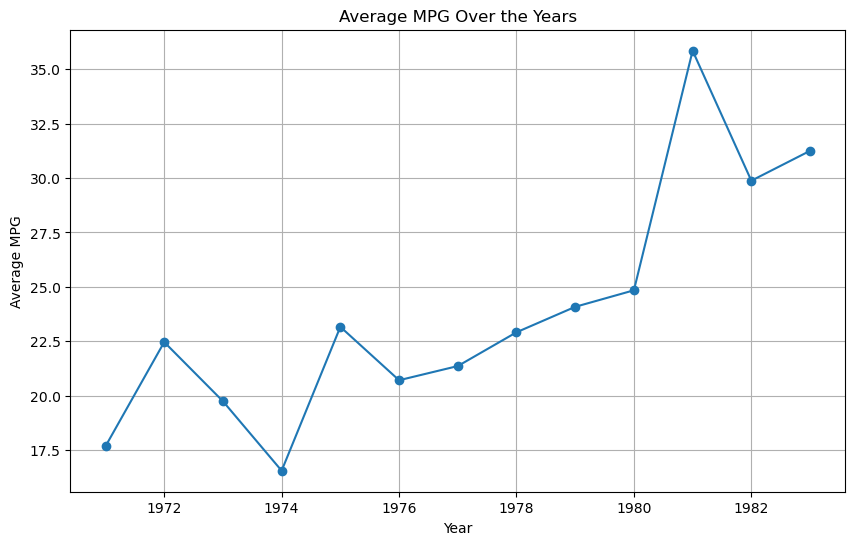

In [11]:
# Group by 'year' and calculate the mean mpg for each year
mpg_by_year = df.groupby('year')['mpg'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(mpg_by_year.index, mpg_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('Average MPG Over the Years')
plt.grid(True)
plt.show()

2.Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?

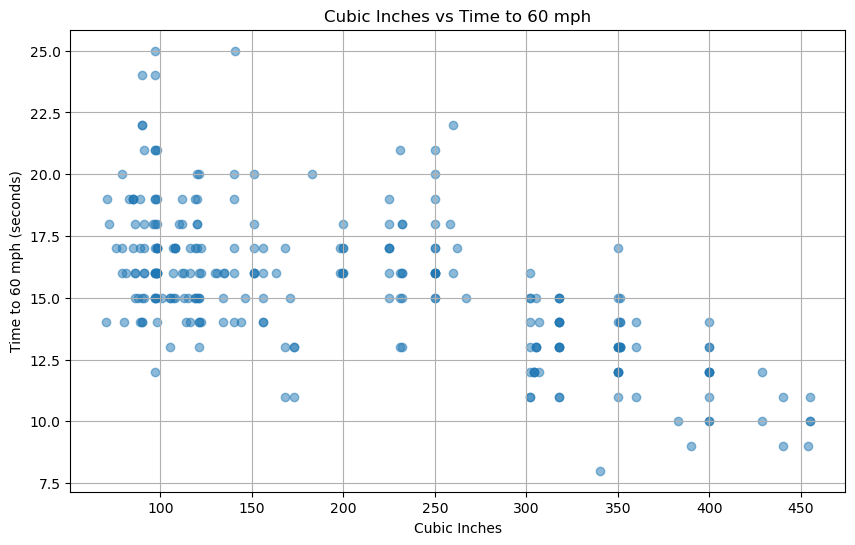

Correlation coefficient between cubic inches and time to 60 mph: -0.613344432047153


In [12]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cubicinches'], df['time-to-60'], alpha=0.5)
plt.xlabel('Cubic Inches')
plt.ylabel('Time to 60 mph (seconds)')
plt.title('Cubic Inches vs Time to 60 mph')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation = df['cubicinches'].corr(df['time-to-60'])
print(f'Correlation coefficient between cubic inches and time to 60 mph: {correlation}')

3.Does a specific country prefer vehicles with more horse power ?


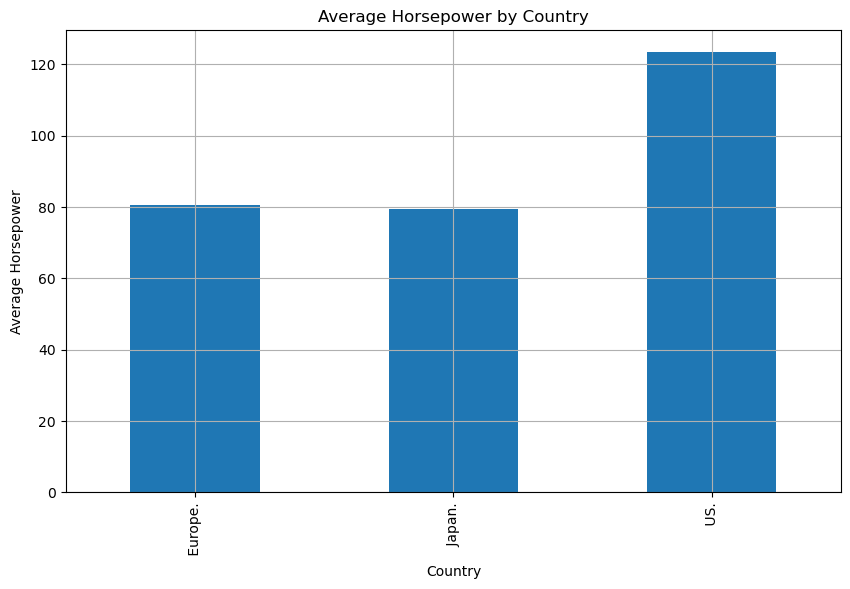

brand
Europe.     80.617021
Japan.      79.313725
US.        123.462025
Name: hp, dtype: float64

In [13]:
# Group by 'brand' and calculate the mean horsepower for each country
hp_by_brand = df.groupby('brand')['hp'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
hp_by_brand.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Horsepower')
plt.title('Average Horsepower by Country')
plt.grid(True)
plt.show()

# Display the mean horsepower for each country
hp_by_brand

4.How does the horse power affects the average of the vehicle ?


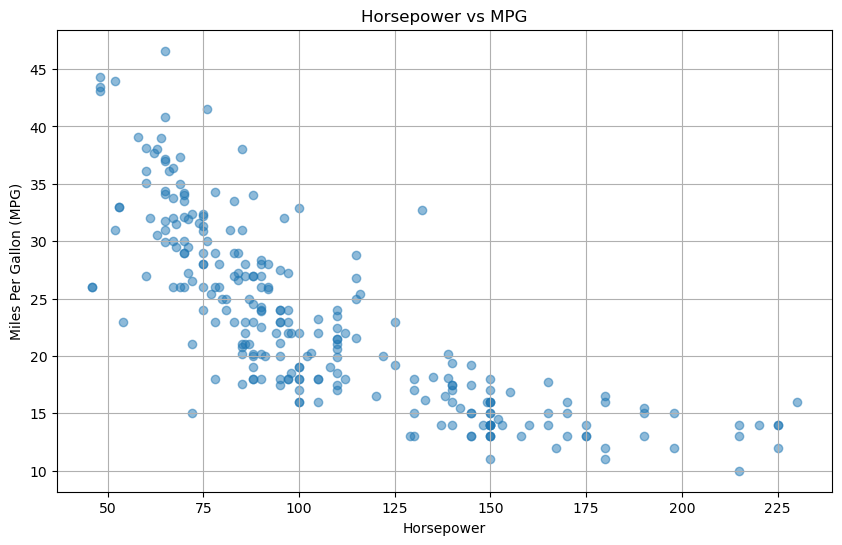

Correlation coefficient between horsepower and mpg: -0.7799539421859406


In [14]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['hp'], df['mpg'], alpha=0.5)
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.title('Horsepower vs MPG')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
hp_mpg_correlation = df['hp'].corr(df['mpg'])
print(f'Correlation coefficient between horsepower and mpg: {hp_mpg_correlation}')

5.How does the cubic inches affects the average of the vehicle ?


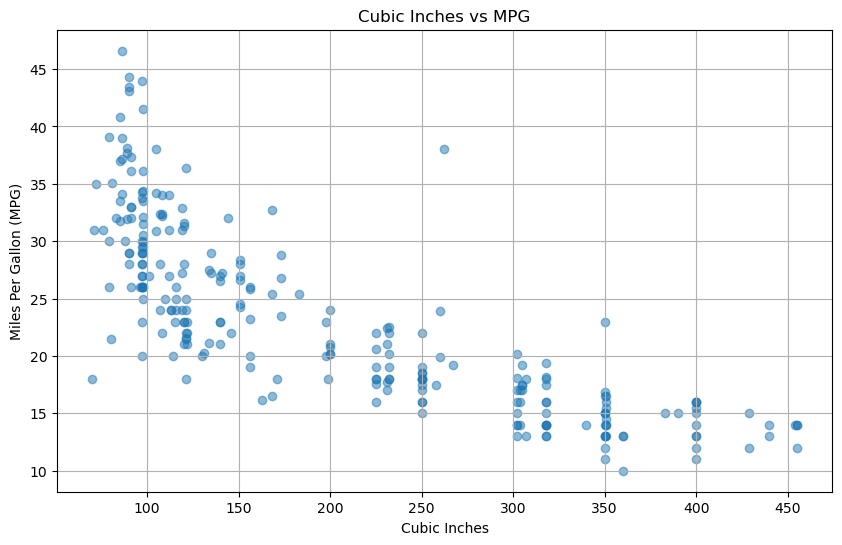

Correlation coefficient between cubic inches and mpg: -0.8038303949009085


In [15]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cubicinches'], df['mpg'], alpha=0.5)
plt.xlabel('Cubic Inches')
plt.ylabel('Miles Per Gallon (MPG)')
plt.title('Cubic Inches vs MPG')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
cubicinches_mpg_correlation = df['cubicinches'].corr(df['mpg'])
print(f'Correlation coefficient between cubic inches and mpg: {cubicinches_mpg_correlation}')

6.What is the effect of number of cylinders on the mpg ?


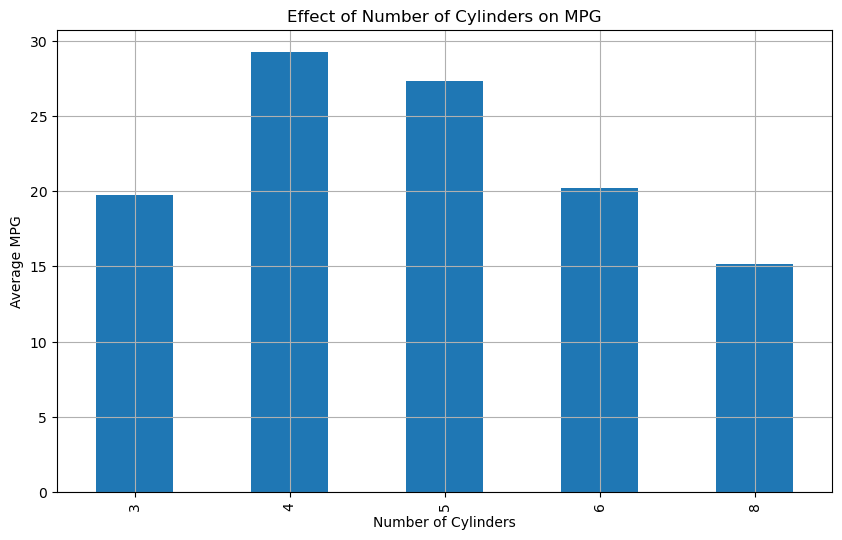

cylinders
3    19.750000
4    29.275806
5    27.366667
6    20.237255
8    15.157895
Name: mpg, dtype: float64

In [16]:
# Group by 'cylinders' and calculate the mean mpg for each group
mpg_by_cylinders = df.groupby('cylinders')['mpg'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mpg_by_cylinders.plot(kind='bar')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.title('Effect of Number of Cylinders on MPG')
plt.grid(True)
plt.show()

# Display the mean mpg for each number of cylinders
mpg_by_cylinders

7.What relation between cubic inches , number of cylinders and horse power you can observe from the data ?

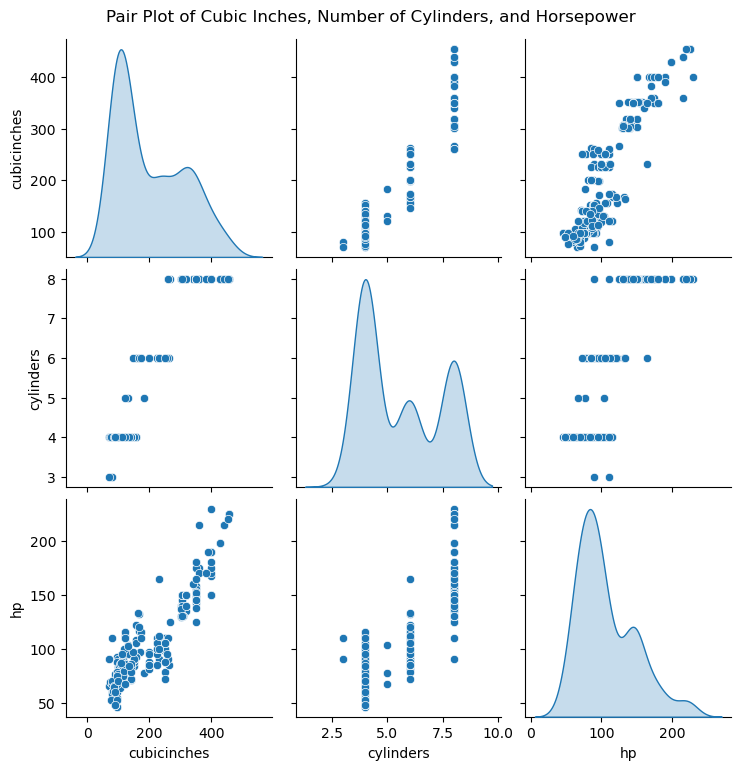

In [17]:
# Pair plot to visualize relationships between cubic inches, number of cylinders, and horsepower
sns.pairplot(df, vars=['cubicinches', 'cylinders', 'hp'], kind='scatter', diag_kind='kde')
plt.suptitle('Pair Plot of Cubic Inches, Number of Cylinders, and Horsepower', y=1.02)
plt.show()

8.How much proportion of the total records is occupied by vehicles with 8 cylinders ?

In [18]:
# Calculate the number of vehicles with 8 cylinders
vehicles_with_8_cylinders = df[df['cylinders'] == 8].shape[0]

# Calculate the total number of vehicles
total_vehicles = df.shape[0]

# Calculate the proportion
proportion_8_cylinders = vehicles_with_8_cylinders / total_vehicles

print(f'Proportion of vehicles with 8 cylinders: {proportion_8_cylinders:.2%}')

Proportion of vehicles with 8 cylinders: 29.69%


9.How much proportion of the total records is occupied by vehicles with 8 cylinders ?

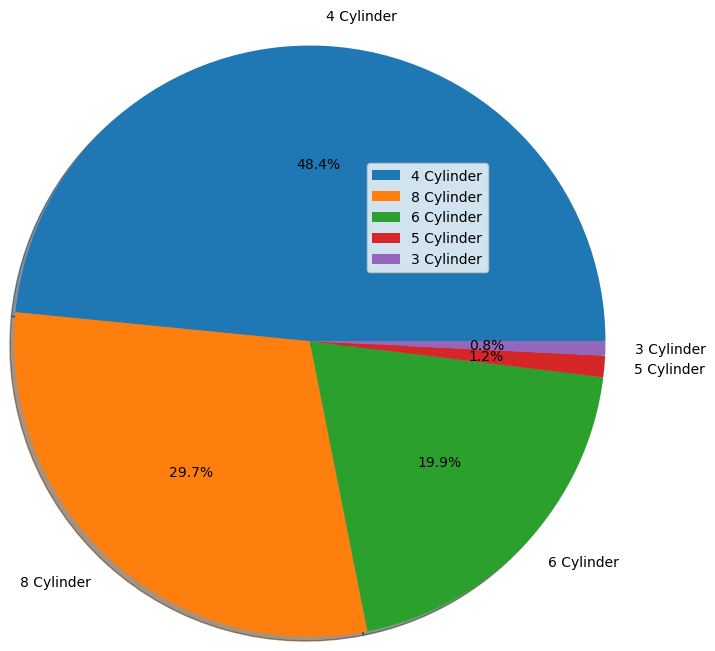

In [20]:
plt.pie(df.cylinders.value_counts(), labels=["4 Cylinder", "8 Cylinder", "6 Cylinder", "5 Cylinder", "3 Cylinder"], autopct='%1.1f%%', shadow=True, radius=2)
plt.legend(loc="upper right")

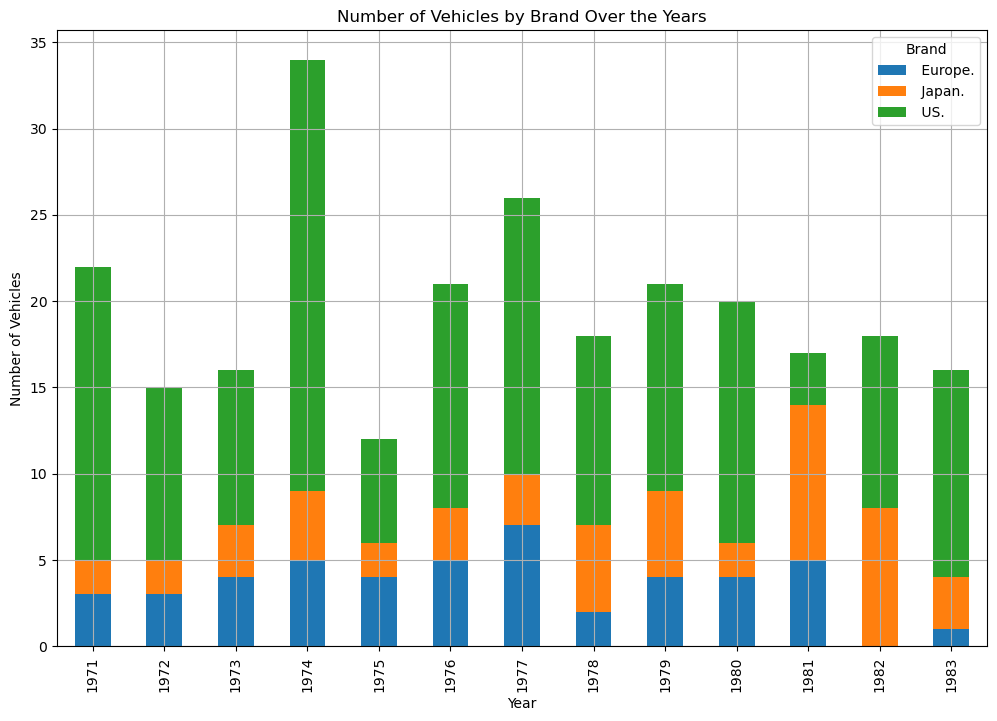

brand,Europe.,Japan.,US.
year,,,
1971,3,2,17
1972,3,2,10
1973,4,3,9
1974,5,4,25
1975,4,2,6
1976,5,3,13
1977,7,3,16
1978,2,5,11
1979,4,5,12


In [22]:
# Create a pivot table to see the count of vehicles for each brand per year
pivot_table = df.pivot_table(index='year', columns='brand', aggfunc='size', fill_value=0)

# Plot the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Brand Over the Years')
plt.legend(title='Brand')
plt.grid(True)
plt.show()

# Display the pivot table
pivot_table

In [ ]:
Based on the analysis performed in the Jupyter Notebook, here are the conclusions:

1. Improvement in MPG Over the Years:
    - There is a noticeable improvement in the average miles per gallon (MPG) over the years. This can be observed from the plot showing the average MPG for each year.

2. Effect of Cubic Inches on Time to Reach 60 MPH:
    - There is a negative correlation between cubic inches and the time to reach 60 miles per hour, with a correlation coefficient of -0.613. This indicates that vehicles with larger engine sizes (cubic inches) tend to reach 60 mph faster.

3. Country Preference for Horsepower:
    - Vehicles from the US tend to have higher average horsepower compared to those from Europe and Japan. This is evident from the bar plot showing the average horsepower by country.

4. Effect of Horsepower on MPG:
    - There is a strong negative correlation between horsepower and MPG, with a correlation coefficient of -0.780. This suggests that vehicles with higher horsepower tend to have lower fuel efficiency.

5. Effect of Cubic Inches on MPG:
    - There is a strong negative correlation between cubic inches and MPG, with a correlation coefficient of -0.804. This indicates that vehicles with larger engine sizes tend to have lower fuel efficiency.

6. Effect of Number of Cylinders on MPG:
    - Vehicles with fewer cylinders tend to have higher average MPG. This is shown in the bar plot where vehicles with 4 cylinders have the highest average MPG, while those with 8 cylinders have the lowest.

7. Relationship Between Cubic Inches, Number of Cylinders, and Horsepower:
    - The pair plot shows that there is a positive relationship between cubic inches and horsepower, as well as between the number of cylinders and horsepower. Vehicles with more cylinders and larger engine sizes tend to have higher horsepower.

8. Proportion of Vehicles with 8 Cylinders:
    - Approximately 29.69% of the total vehicles in the dataset have 8 cylinders.



These conclusions provide a comprehensive understanding of the relationships between various attributes of the vehicles in the dataset.